In [1]:
from skimage import io
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
%matplotlib notebook

In [70]:
def plot_blobs(image, image_gray):
    min_sigma, max_sigma, threshold, num_sigma, sigma_ratio = 1, 30, 0.2, 10, 1.6

    blobs_log = blob_log(image_gray, min_sigma=min_sigma, max_sigma=max_sigma, threshold=threshold, num_sigma=num_sigma)

    # Compute radii in the 3rd column.
    blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

    blobs_dog = blob_dog(image_gray, min_sigma=min_sigma, max_sigma=max_sigma, threshold=threshold, sigma_ratio=sigma_ratio)
    blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

    blobs_doh = blob_doh(image_gray, min_sigma=min_sigma, max_sigma=max_sigma, threshold=threshold, num_sigma=num_sigma)

    blobs_list = [blobs_log, blobs_dog, blobs_doh]
    colors = ['yellow', 'lime', 'red']
    titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
              'Determinant of Hessian']
    sequence = zip(blobs_list, colors, titles)

    fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
    ax = axes.ravel()

    for idx, (blobs, color, title) in enumerate(sequence):
        ax[idx].set_title(title)
        ax[idx].imshow(image)
        for blob in blobs:
            y, x, r = blob
            c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
            ax[idx].add_patch(c)
        ax[idx].set_axis_off()

    plt.tight_layout()
    plt.show()

In [76]:
name = 'puccini_boheme0'
image = io.imread('samples/'+name+'.jpg')
image_nostaff = io.imread('samples/'+name+'_nostaff.jpg')


/home/sapo/.cache/pypoetry/virtualenvs/omr-0l1Jn0gu-py3.6/lib/python3.6/site-packages/skimage/feature/blob.py:125: RuntimeWarning: invalid value encountered in double_scalars
  r1 = blob1[-1] / blob2[-1]
/home/sapo/.cache/pypoetry/virtualenvs/omr-0l1Jn0gu-py3.6/lib/python3.6/site-packages/skimage/feature/blob.py:126: RuntimeWarning: divide by zero encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
/home/sapo/.cache/pypoetry/virtualenvs/omr-0l1Jn0gu-py3.6/lib/python3.6/site-packages/skimage/feature/blob.py:127: RuntimeWarning: divide by zero encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
/home/sapo/.cache/pypoetry/virtualenvs/omr-0l1Jn0gu-py3.6/lib/python3.6/site-packages/skimage/feature/blob.py:129: RuntimeWarning: invalid value encountered in subtract
  d = np.sqrt(np.sum((pos2 - pos1)**2))


<IPython.core.display.Javascript object>


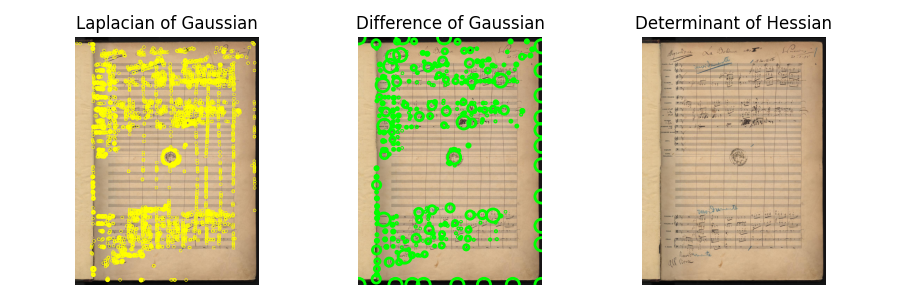

In [77]:
plot_blobs(image, image_nostaff)

<IPython.core.display.Javascript object>


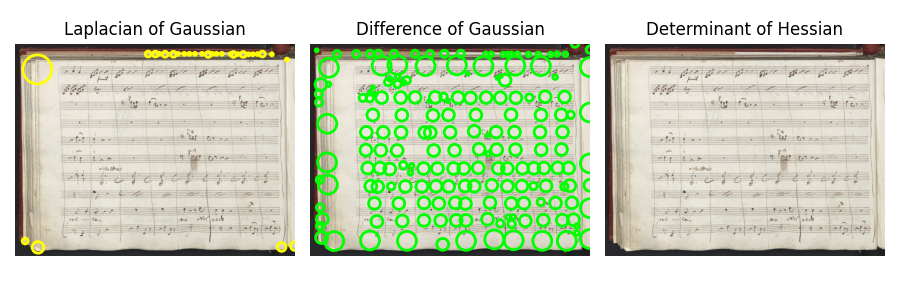

In [23]:
plot_blobs(image, rgb2gray(image))